# Improving Goodwin (1)

In [34]:
### THIS IS JUST FOR A MORE PRACTICAL AND FANCY NOTEBOOK
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 99%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))
##################################################
import sys 

# Install all dependencies
#!{sys.executable} -m pip install numpy scipy matplotlib pyvis 

# Change path as the folder adress you have put the library in 
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\GEMMES" 
sys.path.insert(0, path)
import pygemmes as pgm

## List of hypotheses in a Goodwin 

* **One productive sector, one household sector, no government**
* **production** Production has no substituability between labor and capital
* **use of productive capital** is always at the maximum
* **Labor level** instant adjust to production need OR profit optimization
* There is no intermediary consumption (you can activate it, it shifts the equilibrium on $\omega$)
* **Consumption** All wages are spent in consumption
* **Investment** All profits are reinvested in investment 
* **price** is considered constant
* **Instantaneous effects** there is no relaxation in the system 
* **wage** evolution through Philips curve
* **Exogenous population growth**
* **Harrod-netural technological progress** while $\nu$ remain constant




####################
Loading model GoodwinFull from C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_models
The following fields are defined in the model but not it the library :
	- statevar: ['C', 'dotV', 'W']
The following fields are identified as parameters :
	- independant : ['alpha', 'n', 'delta', 'r', 'sigma', 'deltah', 'nu', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : ['pi', 'omega', 'g']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'GDP', 'c', 'L', 'C', 'W', 'Pi', 'inflation', 'pi', 'employment', 'omega', 'I', 'phillips', 'g', 'Ir', 'dotV']
	- differential: ['a', 'N', 'w', 'p', 'K', 'D', 'Dh', 'V', 'u', 'H', 'time']
############################################################
####################      SUMMARY       ####################
####################################################

time step 3027 / 10000
time step 6056 / 10000
time step 9013 / 10000
time step 10000 / 10000


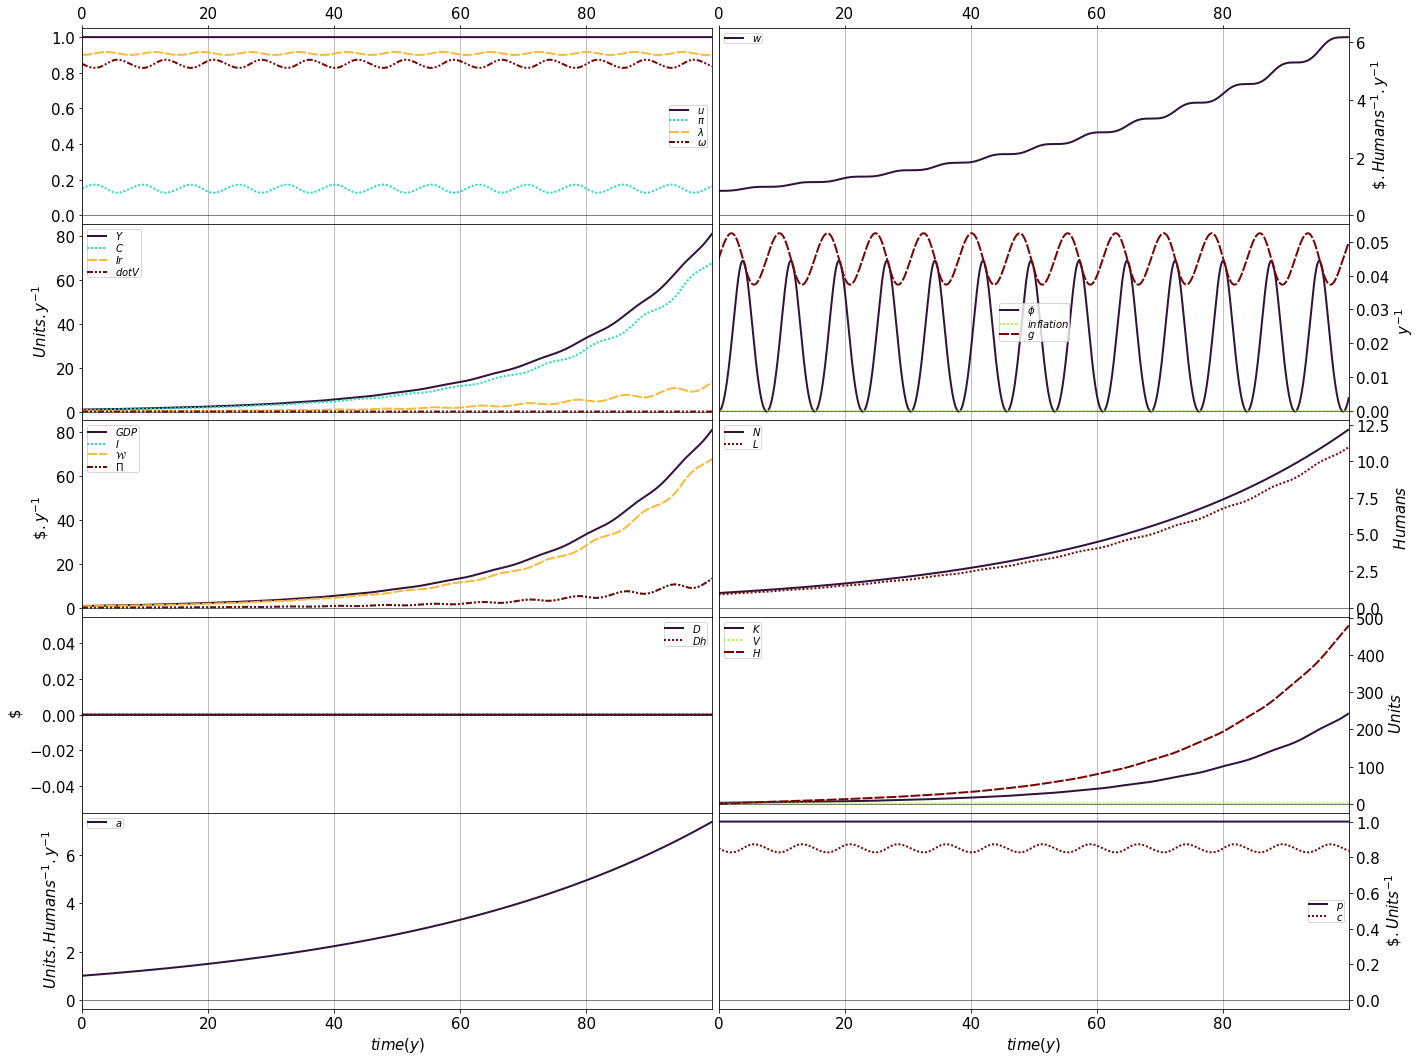

In [33]:
hub=pgm.Hub('GoodwinFull')
hub.get_summary()
hub.run()
hub.plot()

## Hidden stock-flow structure in a Goodwin model

Three stock-flow variation are hidden in a Goodwin model 

$$\dot{D}=rD + wL- pC + \text{shareholdings}_0$$
$$\dot{D_h}= rD_h - wL + pC - \text{shareholdings}$$
$$\dot{V} = \underbrace{Y}_{\text{production}} - \underbrace{\Gamma Y}_{\text{intermediary consumption}} - \underbrace{C}_{\text{consumption}} - \underbrace{\Xi I}_{\text{investment}}$$ 

Goodwin model correspond to the case : 
* $C = wL/p$
* $I = Y-wL/p$
* $\Gamma=0$
* $\Xi=1$ (by definition in a monosectoral system)
* $D(t=0)=D_h(t=0)=0$
* $\text{shareholdings}_0=0, \text{shareholdings}=0$
* $p=1$

In those cases, there is no variation of $D,D_h,V$

## About profits 

There is no unified definition of profits. Here are two : 
$$\underbrace{\Pi^{expected}}_{\text{expected profits}} := \underbrace{pY}_{\text{expected sales}} 
    -  \underbrace{wL}_{\text{wage bill}} 
    -  \underbrace{Y\Gamma p}_{\text{intermediary consumption}} 
    -  \underbrace{\delta K  \Xi p}_{\text{capital degradation}}
    -  \underbrace{rD}_{\text{debt interests}} 
$$
$$\underbrace{\Pi^{instant}}_{\text{instant profits}} := \underbrace{p(Y-\dot{V})}_{\text{sales}} 
    -  \underbrace{wL}_{\text{wage bill}} 
    -  \underbrace{Y\Gamma p}_{\text{intermediary consumption}} 
    -  \underbrace{\delta K  \Xi p}_{\text{capital degradation}}
    -  \underbrace{rD}_{\text{debt interests}} 
    + \underbrace{c \dot{V}}_{inventory creation}
$$

We will have in this example : 
$$\Pi^{instant}=\Pi^{expected}+(c-p)\dot{V}$$

If there is some taxes on profits/shareholding $\mathcal{T}$ that has to be taken into account internally, the circularity can be solved directly : 

$$\Pi= \dfrac{\Pi_0}{1+\mathcal{T}}$$

### Dealing with inventory variation in profit

if $\pi=\mathcal{f}(\dot{V})$ since investment is a function of profit $I=\mathcal{g}(\pi)$, since variation of inventory a function of investment $\dot{V}=\mathcal{h}(I)$ , we have circularity of state variables (a.k.a a fixed point). 

We can deal with it in the case of a monosectoral (solving by hand the circular part), not on a more realistic system. 

=> Either $\pi$ has to be determined on expected sales, either the investment has to become a differential equation (or we solve fixed points)

### The paradox of investment and intermediary consumption in a monosectoral case

If the system is monosectoral, a productive sector will buy things to himself, so the operation is transparent on the profit. However, it's not a part of the production bought by the consumer, so it will impact debt. 

Monosectoral systems neglect intermediary consumption, so the production $Y$ is only the added value. On a monosectoral level, $1/(1-\Gamma)$ can be seen as a kind of EROI. 

### Positive profits and recessions 

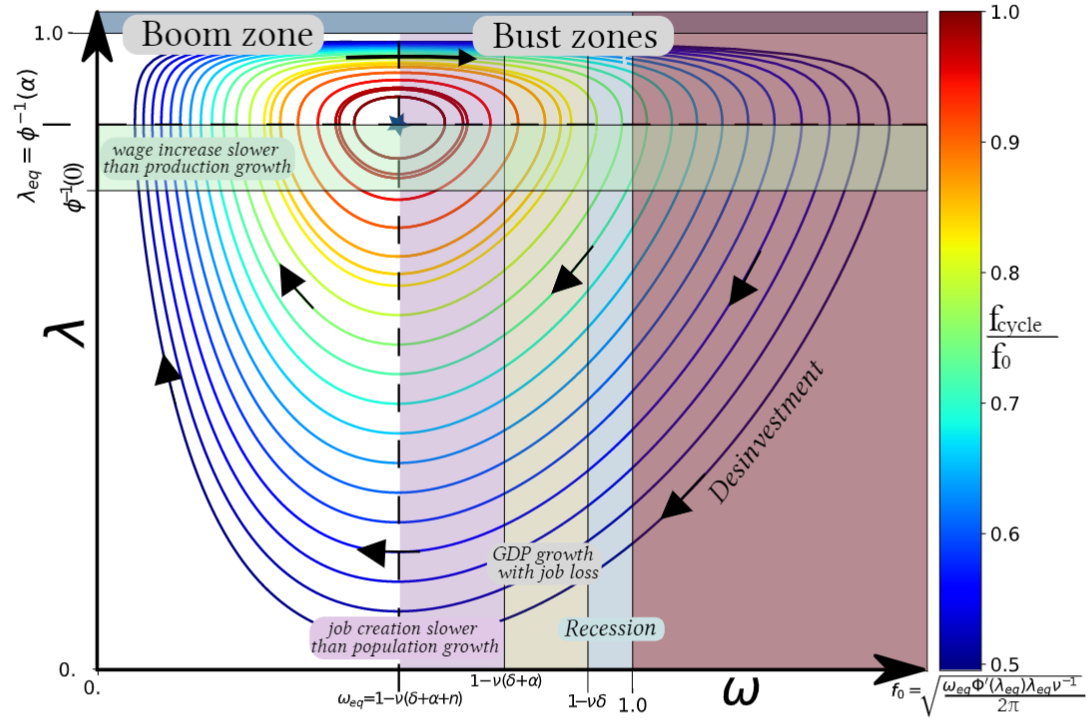

if $\pi=1-\omega$, negative growth can happen with positive profits. Taking into account capital degradation will remove this problem

### Dealing with this (even without inventory)

$\pi$ takes into account all the components : 

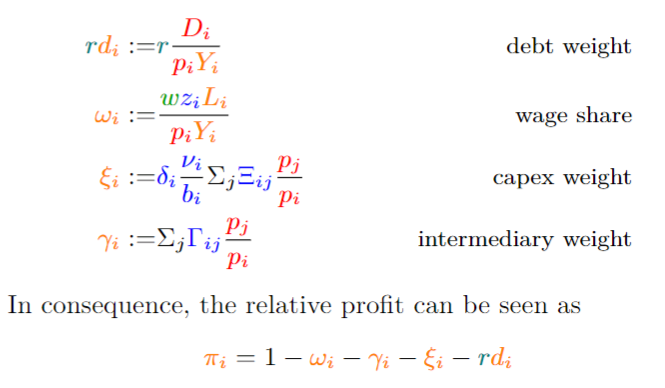

price $c =p (\omega + \xi + \gamma)$ in inflation 

If $Y$ is the GDP, the real production is $Y(1-\Gamma)$, $\nu \to \nu(1-\Gamma)^{-1}$

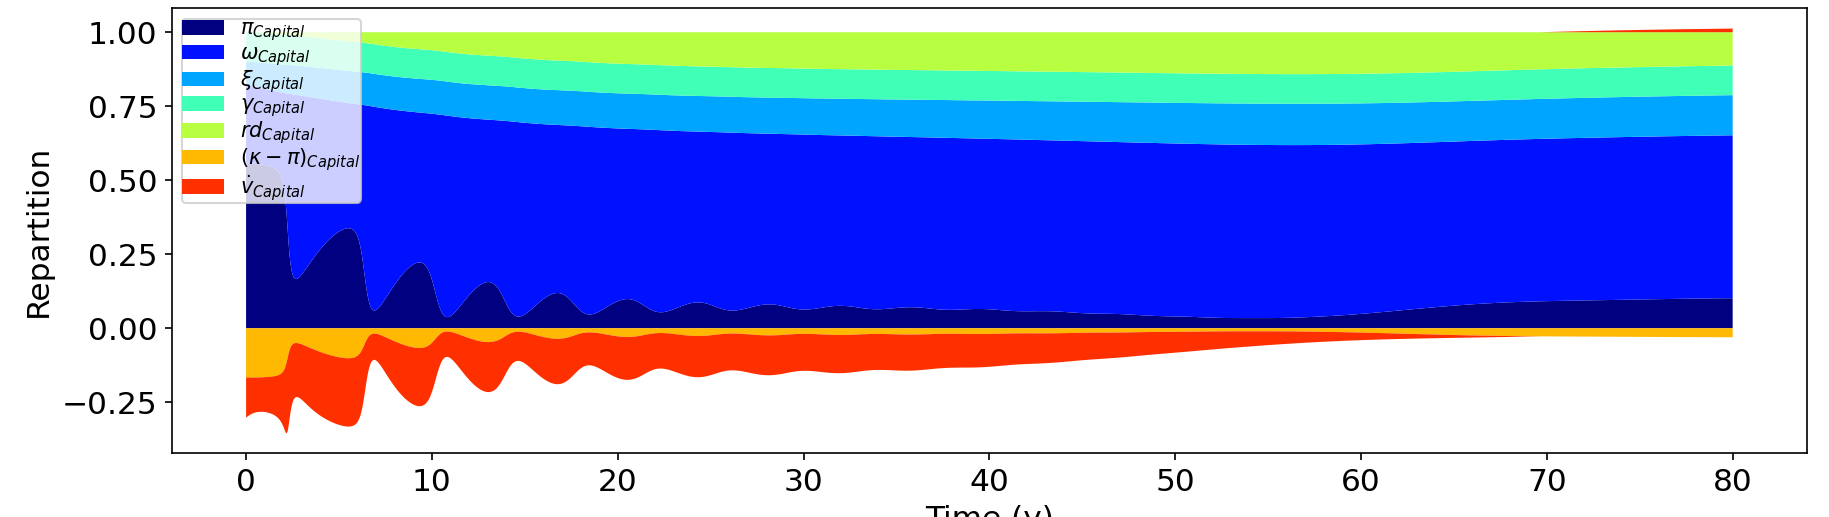

*illustration from a monosectoral run*

### Investment theory and banks

Using this convention, in a Goodwin, we now have to take into account capital destruction in the investment : 

$I^{n}=pY(\pi+\xi)$

If now there can be a lever effect through banks, they'll take into account only the profit a sector can do : 

$I^{n}=pY(\kappa(\pi)+\xi)$

### Investment and accountability 

for accountability, inventory increase is an investment, as seen in $\Pi^{instant}$. Using accountability definition in the dynamic of the model, will break $\dot{K}=I-\delta K$. Be careful of your conventions

### Investment and relaxation 

If you consider that there is a time $\tau$ for a unit of capital to be effective : 
* $dB/dt = I - B\tau$
* $dK/dt = B\tau - \delta K$

$\tau$ can be endogenous (to see later)

### Limitation of dynamical system instant approach

A unit of capital $K$ will produce during its life output with a speed $\nu^{-1}$. If there is no more investment 


$\text{Output}_{total}= \int_0^{\infty} K e^{-\delta t} u \nu^{-1} dt$. If everything remain constant, $\text{Output}_{total}= K\dfrac{u}{\delta\nu}$. If someone anticipate change (diminution of a product use through $u$, lower yields on $\nu$, more damage on $\delta$, the perception of capex weight for investor will be different than the instant one, since they will calculate it typically on a time $\delta^{-1}$.  

Taking into account such phenomena is out of our scope. But $\pi$ for banks will be highly different than the $\pi$ measured

### Intermediary conclusion

* Be careful of your definitions (accountability, instant, inventory variation, capex weight)
* Instant definitions and long-term definitions
* Capex should be removed from profit (and thus from the $\kappa()$ function)
* Intermediary consumption matter


## Technical progress shenaningans

### Technical progress and $\nu$ endogenisation
$Y=\min ( K/\nu, aL )$, $a$ being technical progress. 

We often assume that $\nu$ is constant but $a$ changing. $\dot{a}=a\alpha$. 
On an exogenous theory of technical progress, if climate change diminish the efficiency of machines $\nu$, then we fire people as their efficiency is not a question of capital efficiency. 

One should use either : 
* $\dot{a}=a (\alpha - \frac{\dot{\nu}}{\nu})$
* define a as people needed to manipulate a unit of capital : $Y=\nu^{-1}( K, aL)$. As it is in a CES function $Y=A (b K^{-\eta} + (1-b) (e^{\alpha t}L)^{-\eta} )^{-1/\eta}$  

This correct a few behavior for example in `coping with collapse` model, and will greatly facilitate thermodynamic endogenisation (such as Gregoire's work or resource diminution)

### Kaldor-Verdorn and other extensions

Technical progress on "classic Leontiev"

growth rates :
* $g_k = \left(\dfrac{\dot{K}}{K} - \delta \right)$ growth rate of capital 
* $\dfrac{\dot{\lambda}}{\lambda}= g_k - \alpha - n$ relative growth of employment rate

We can consider that : 
1. technical progress increase with investment $\alpha += \alpha_0 g_k$ 
2. technical progress is impacted by recruitment $\alpha -= \gamma \dfrac{\dot{\lambda}}{\lambda}$
3. technical progress is impacted by workers experience accumulation $\alpha += \alpha_1 \lambda$ 

points 1 and 2 are roughly "equivalent" : 
$$\alpha(\lambda,g_k)= cte +  \alpha_0 + \beta g_k + \gamma \dfrac{\dot{\lambda}}{\lambda} + \alpha_1 \lambda = [cte- \gamma( \alpha + n)] + (\alpha_0 + \gamma ) g_k  + \alpha_1 \lambda $$

Impact : Kaldor-Verdorn is destabilizing , experience is stabilizing. 
Because of circular aspect of a Goodwin system, there is little path dependency 

####################
Loading model reduced_G_KVL from C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_models
The following fields are defined in the model but not it the library :
	- statevar: ['alphaKLV']
	- parameter: ['alpha0', 'alpha1']
The following fields are identified as parameters :
	- independant : ['n', 'alpha', 'delta', 'nu', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : []
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['phillips', 'g', 'alphaKLV']
	- differential: ['employment', 'omega', 'time']

### Identified keys to be changed ###
   Dimensions : []
   Fields : ['alpha0', 'alpha1']
   Ignored :[]
Identified alpha1 as a value change on all axes
Identified alpha0 as a value change on all axes

### Identified keys to be changed ###
   Dimensions : []
   Fields : ['employment', 'omega']
   I

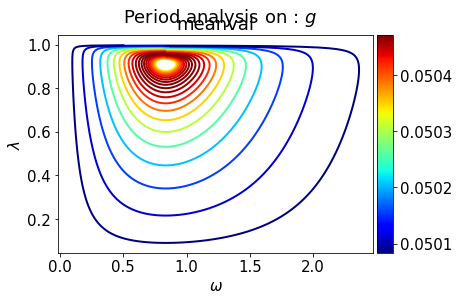

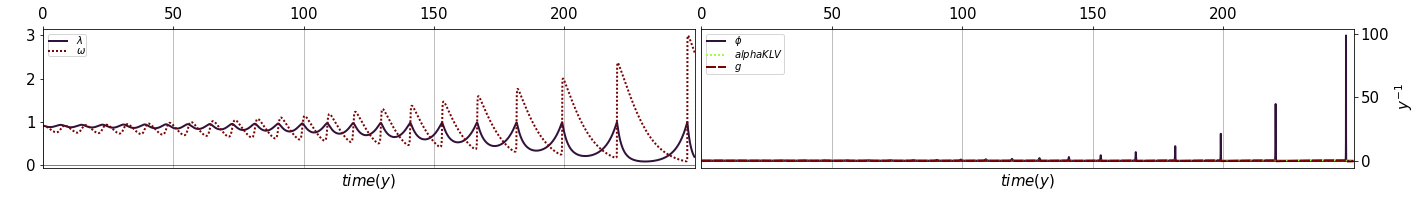

In [11]:
#### KALDOR VERDORN 
hub=pgm.Hub('reduced_G_KVL')
hub.set_preset('GoodwinKV')
hub.set_dparam(**{'employment':.92,'omega':.9})
hub.set_dparam('alpha0',0.1)
hub.set_dparam(**{'Tmax':250})
hub.get_summary()
hub.run()
pgm.plots.cycles_characteristics(hub,'omega','employment','g','meanval')
hub.plot()

####################
Loading model reduced_G_KVL from C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_models
The following fields are defined in the model but not it the library :
	- statevar: ['alphaKLV']
	- parameter: ['alpha0', 'alpha1']
The following fields are identified as parameters :
	- independant : ['n', 'alpha', 'delta', 'nu', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : []
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['phillips', 'g', 'alphaKLV']
	- differential: ['employment', 'omega', 'time']

### Identified keys to be changed ###
   Dimensions : []
   Fields : ['employment', 'omega']
   Ignored :[]
Identified omega as a value change on all axes
Identified employment as a value change on all axes

### Identified keys to be changed ###
   Dimensions : []
   Fields : ['alpha0', 'alpha1']
 

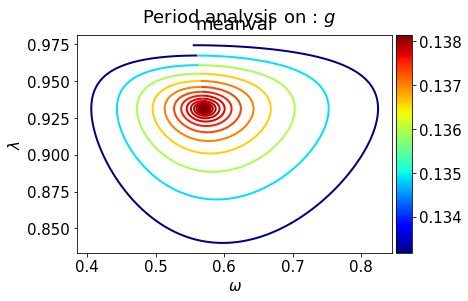

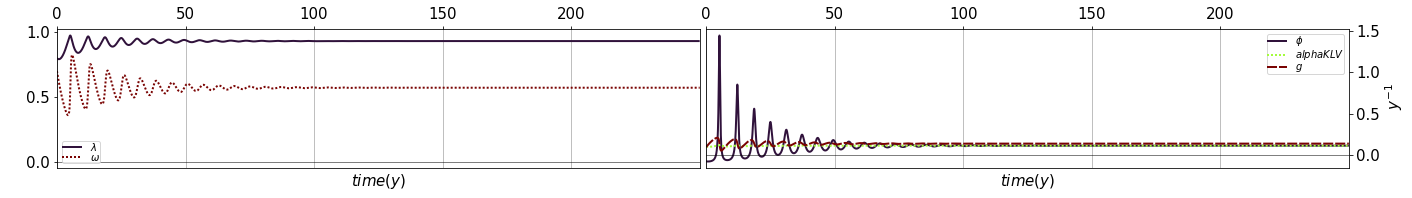

In [14]:
### Employment only 
hub=pgm.Hub('reduced_G_KVL')
#hub.set_preset('GoodwinKV')
hub.set_dparam(**{'employment':.8,'omega':.7})
hub.set_dparam(**{'alpha0':0,'alpha1':0.1})
hub.set_dparam(**{'Tmax':250})
hub.get_summary()
hub.run()
pgm.plots.cycles_characteristics(hub,'omega','employment','g','meanval')
hub.plot()

####################
Loading model reduced_G_KVL from C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_models
The following fields are defined in the model but not it the library :
	- statevar: ['alphaKLV']
	- parameter: ['alpha0', 'alpha1']
The following fields are identified as parameters :
	- independant : ['n', 'alpha', 'delta', 'nu', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : []
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['phillips', 'g', 'alphaKLV']
	- differential: ['employment', 'omega', 'time']

### Identified keys to be changed ###
   Dimensions : ['nx']
   Fields : ['alpha0', 'alpha1']
   Ignored :[]
Identified alpha1 as a value change on all axes
time step 7730 / 10000
time step 10000 / 10000
#############################
KV coeff [0.    0.125 0.25  0.375 0.5  ]
employment coeff [0.06 0

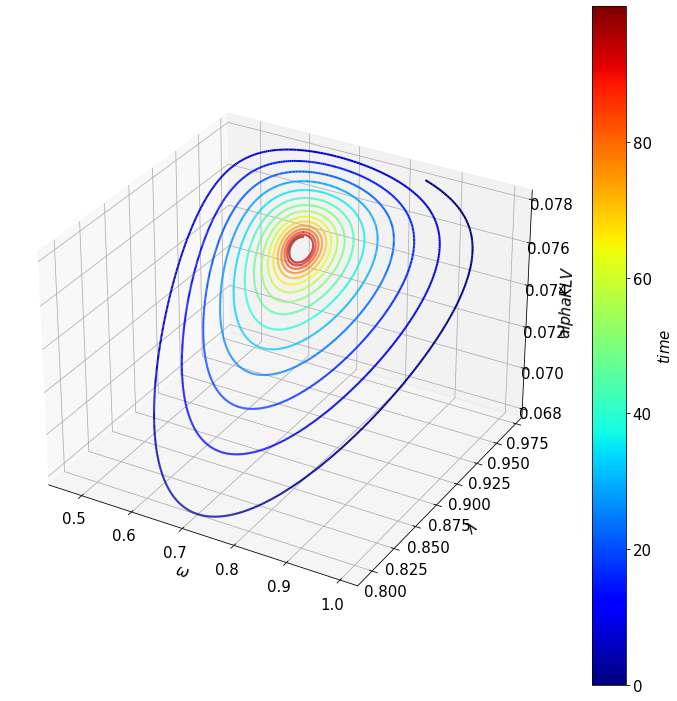

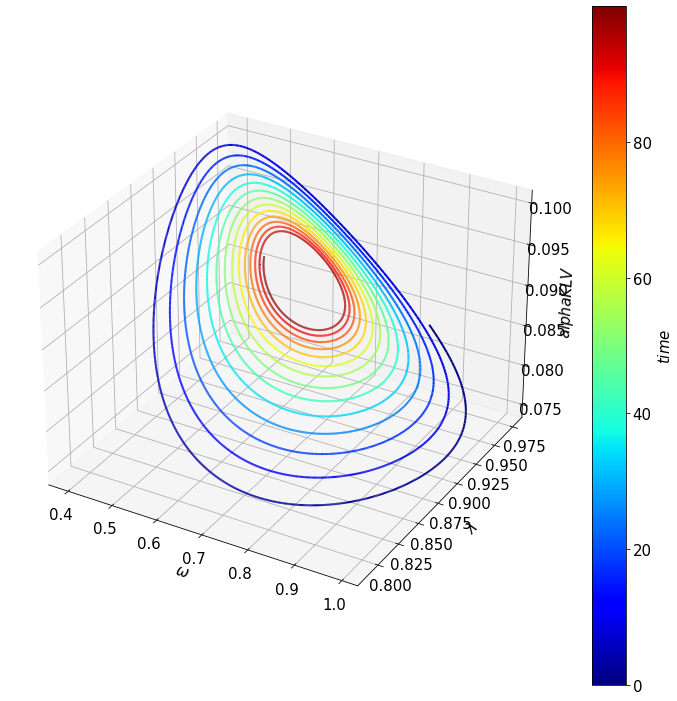

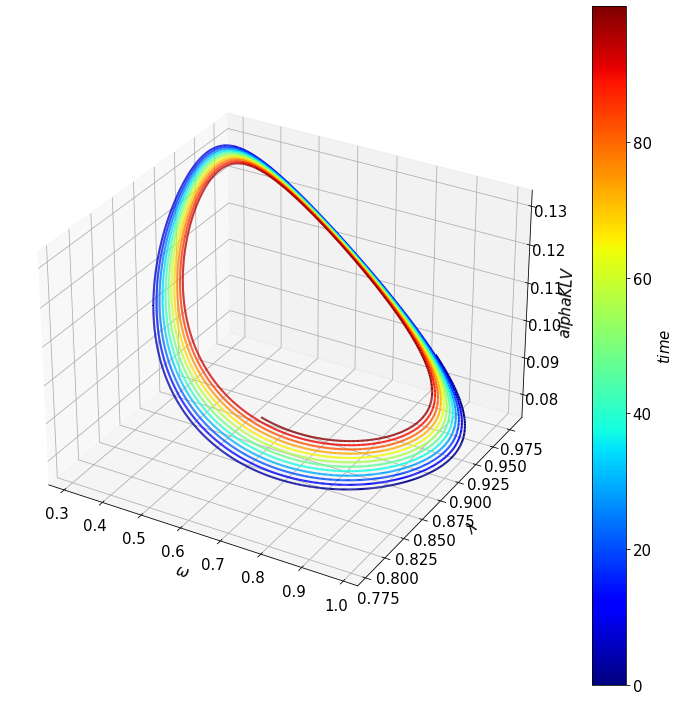

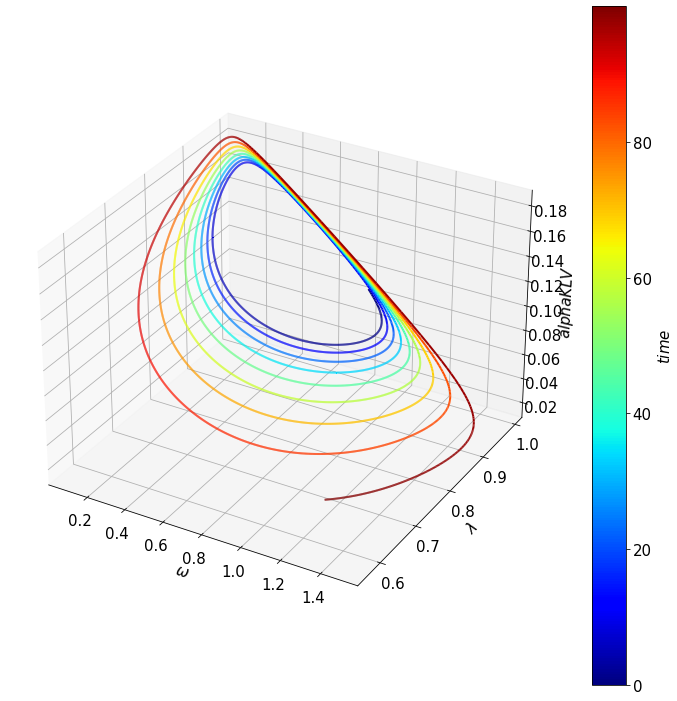

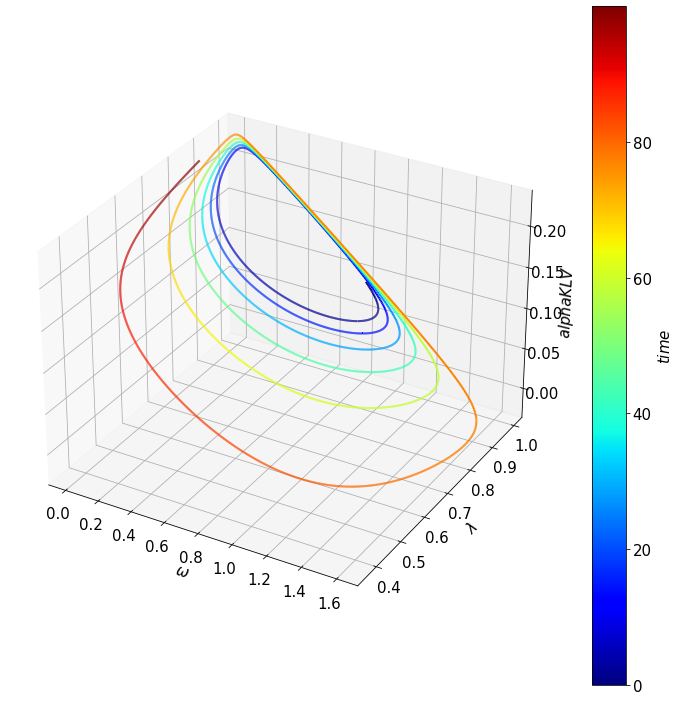

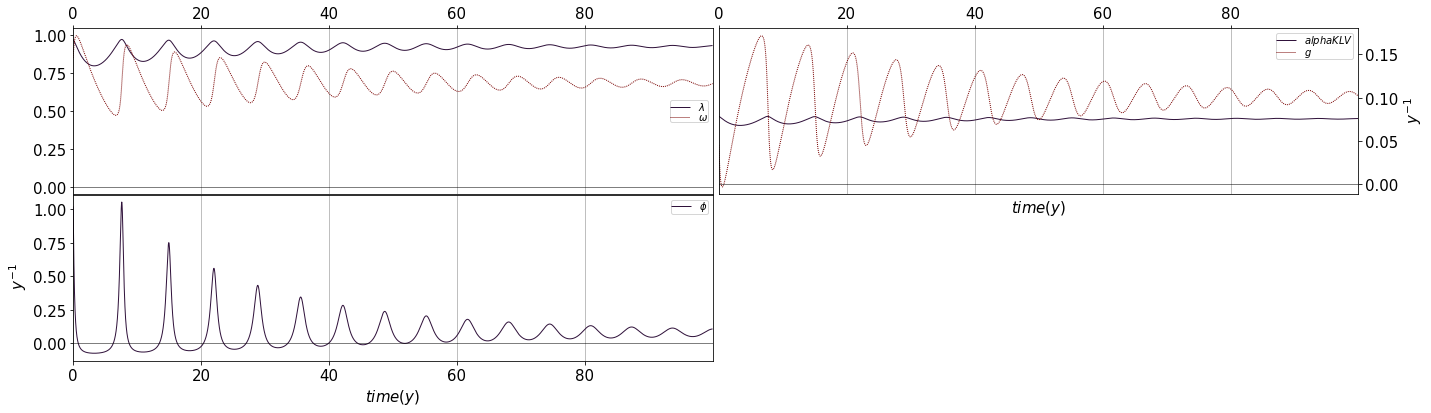

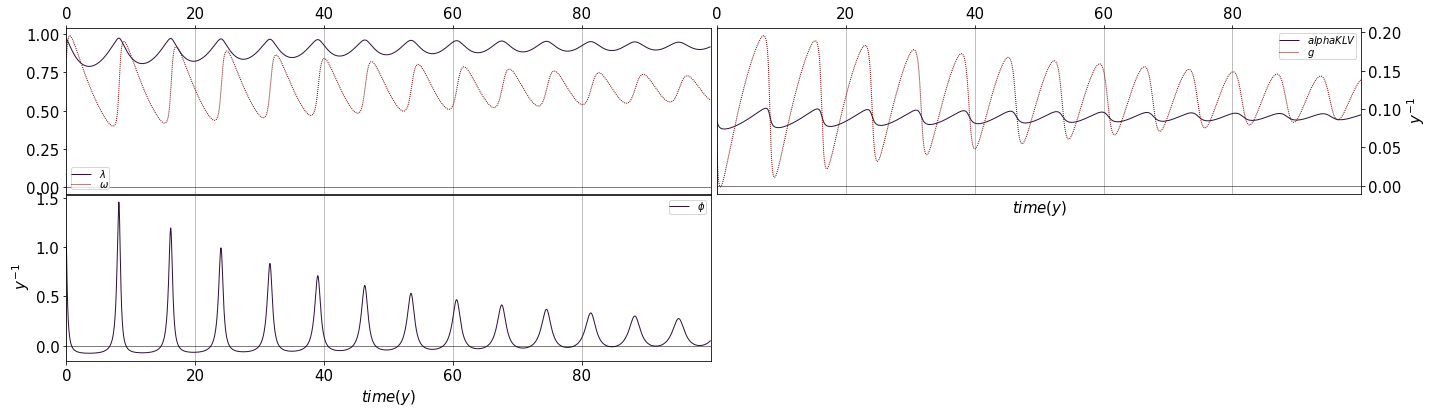

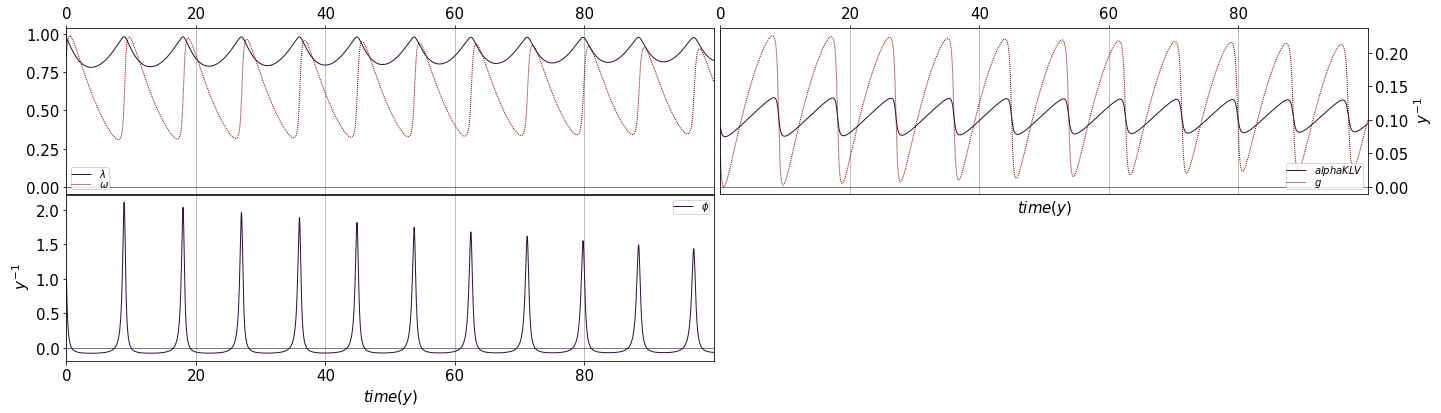

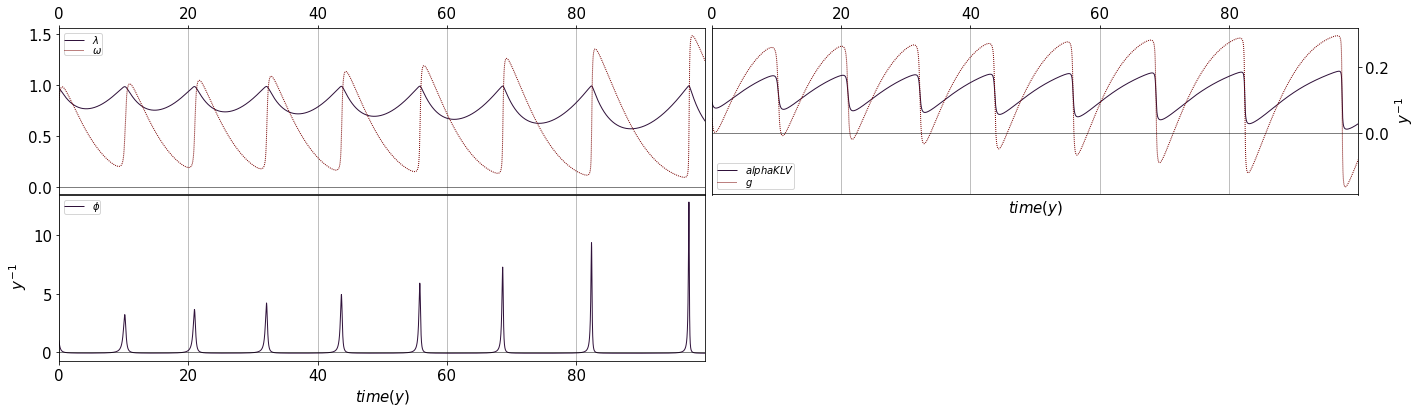

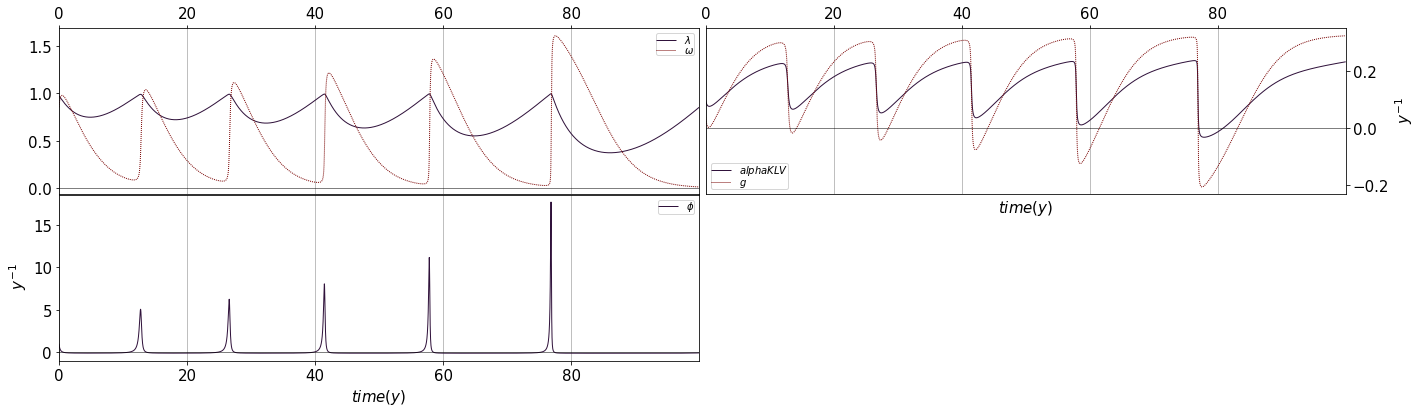

In [21]:
hub=pgm.Hub('reduced_G_KVL')
hub.set_preset('Both')
hub.run()

R=hub.get_dparam()

print('#############################')
print('KV coeff',R['alpha0']['value'][:,0,0,0])
print('employment coeff',R['alpha1']['value'][:,0,0,0])
print('#############################')
hub.plot_preset()


### WHAT WE SHOULD EXPLORE ON TECHNICAL PROGRESS 
* If endogenisation of $\nu$ by external effects (climate change damage, resource extraction), no harrod-neutral technical progress 
* K-V on $\nu$ (or A), employment impact on $a$ (or equivalent to a for labor per capital unit)
* "complex space" for multisectoral technologies (two similar technology of production of different product will benefit on their efficiency)

## Philips curves

1. We are talking about wage mean value. Wage distribution is a long-tail distribution in almost all economies, and the movement of its first moment is not the best indicator of it (inequalities). It does not mean we can do better easily 
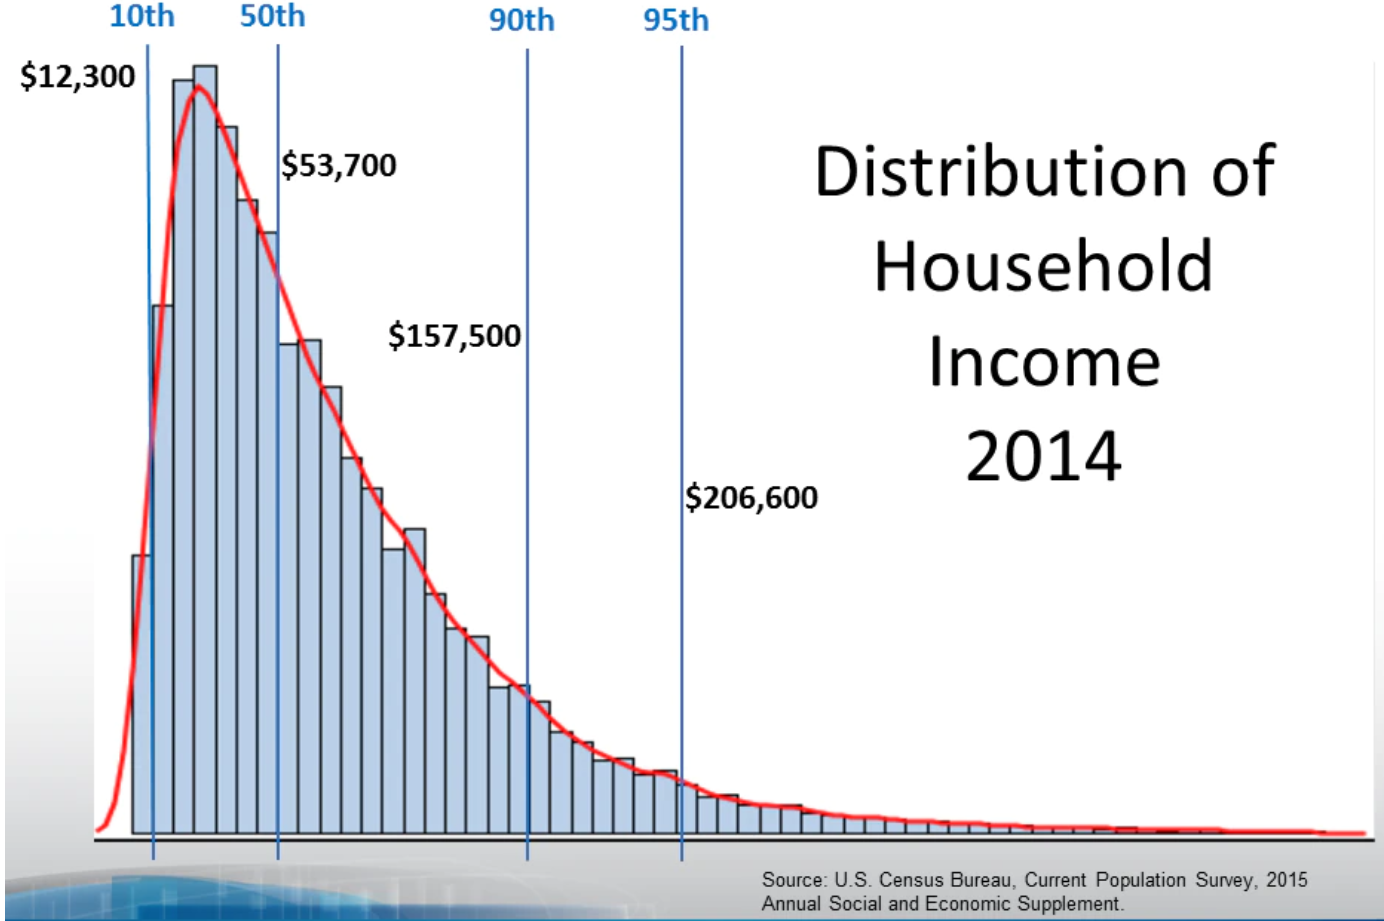
2. If we talk about wage share, it is $\omega = wL/pY$, effects of growth, of inflation, of employment... has to be taken into account if we use wage share data (even if it is a Goodwin model)
3. Short-term and long term Philips curve are not the same : short term Philips : $\dot{w}:=w (\phi(\lambda) + \gamma_i i)$ (what we use), long term $i:\propto \phi^{long}(\lambda) + \dfrac{\dot{w}}{w}$. The long term assume a progression of wage (from technical progress), and deduce inflation from employment.

The idea is that the wage evolution is the consequence of a struggle between labor and capital : 
* If the employment is low labor is not a scarce resource and thus can be paid less (competition between workers)
* If the employment is high, labor is scarce and will limit production, thus can be paid more (competition between firms)

In consequence :
* The more the market is liquid, the bigger the range of the curve (faster reaction)
* The more intra-class competition, the worse their negociation power (unions are removing intra-class competition)

Multiple effects should be taken into account : 
* Firms will not go into debt to pay their employees : $\pi<0$ should never be reached. The smaller the profit, the harder the negociation for employees
* Massive recruitment waves should temporarily increase negociation power $\Phi()=f(\lambda,\dot{\lambda})$
* Inflation blindness will not impact the same way if profit are already percieved as high

### About labor adjustment and employment

When we write $Y=\min(K/\nu,aL)$ employment is not explicit. We can always deduce from profit equation what labor giving the biggest profits : $L_0 \to \dfrac{d\Pi}{dL}\vert_{L=L_0}=0$.

So : $\dfrac{dY}{dL}=\dfrac{w}{p(1-\Gamma)}$. 

In the case of a Leontiev, it gives $L_0=\dfrac{K}{\nu a}$ if $\omega <1$ , $L_0=0$ in other cases. It is the limit case of a CES : 

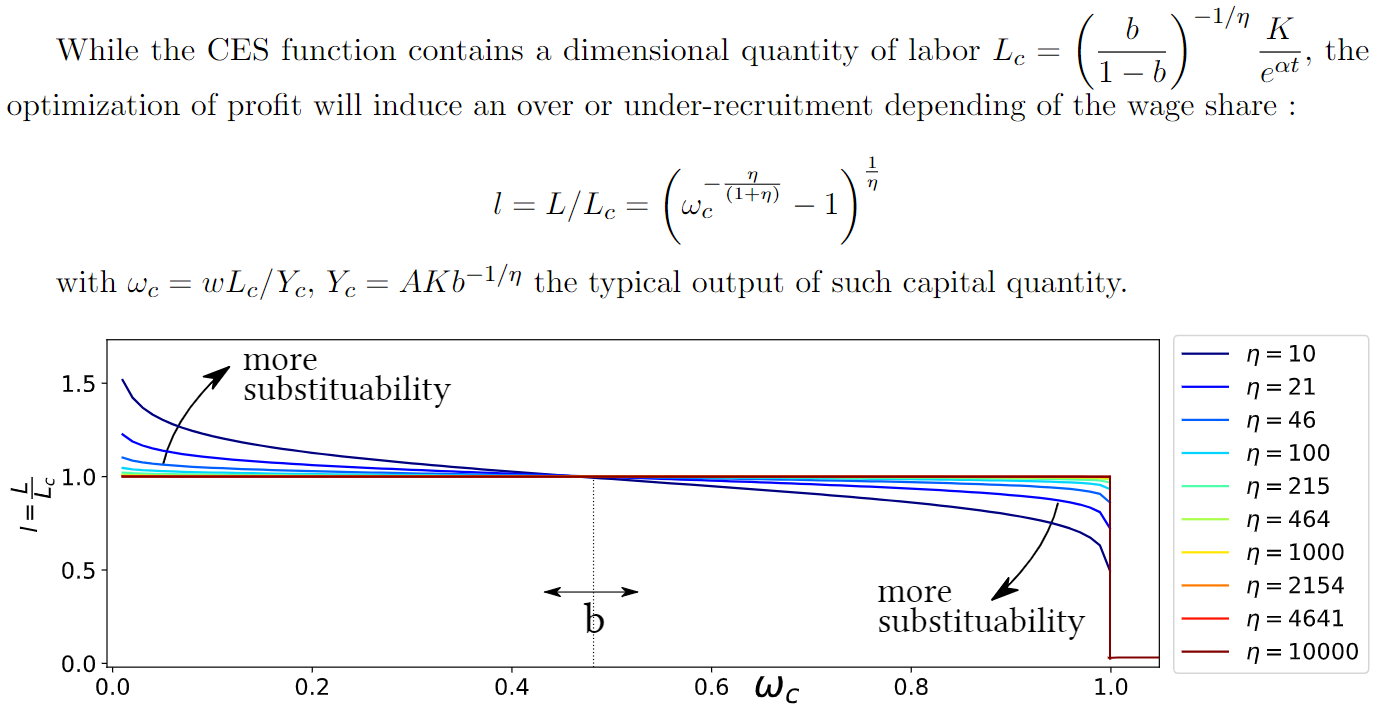


If there is naturally a mechanism to bloc $\omega < 1-\Gamma$ in a CES, there is no mechanism to block $L>N$ cases. The "trick" is to consider that the Philips curve diverges at $\lambda=1^{-1}$, for example : $\Phi(\lambda)=-\phi_0 + \dfrac{\phi_1}{1-\lambda^2}$

The problem with this is that it will bring incredibly fast movement of wage evolution, that have never existed (those are clearly marxist revolution), the bigger the cycles the bigger the revolution. 

time step 9279 / 10000
time step 10000 / 10000


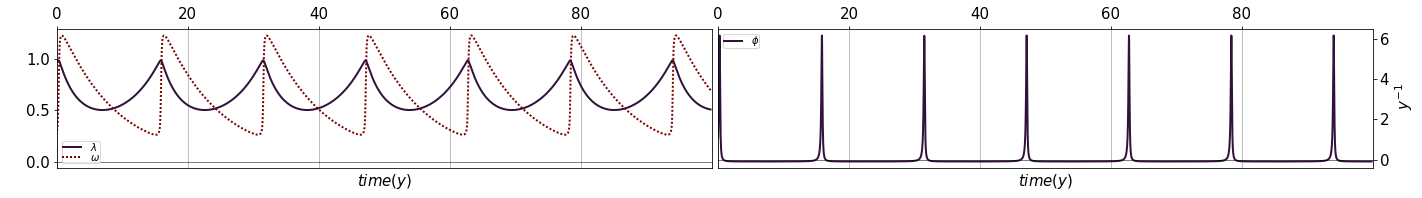

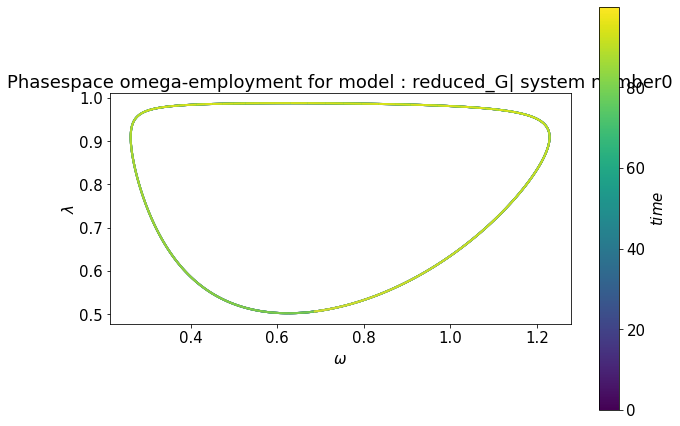

An example of sudden change of wage share with diverging Philips


In [31]:
hub=pgm.Hub('reduced_G',verb=False)
hub.set_dparam(**{'omega':0.3,'lambda':0.3},verb=False)
hub.run()
hub.plot()
pgm.plots.phasespace(hub,'omega','employment')
print('An example of sudden change of wage share with diverging Philips')

We can avoid such things in multiple ways : 
* damp negociating power when profits are low (effect of $\pi$ in Philips curve, width $\dfrac{d\Phi()}{d\pi}<0$)
* consider that $L\neq L_0$ everytime. For example 
$$\dfrac{dL}{dt}=\underbrace{(L_0-L)}_{\text{Quantity to find}}\underbrace{\dfrac{d\Pi}{dL}}_{\text{ benefit of recruitment}} \underbrace{f_{\lambda}(1-\lambda)^{z_{\lambda}}}_{\text{ recruitment speed }} -\underbrace{\lambda\sigma}_{\text{ (Noise)}}$$ 

The first effect is stabilizing, the second is destabilizing. 

####################
Loading model Goodwin-PiInPhi from C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_models
The following fields are defined in the model but not it the library :
	- statevar: ['C', 'W']
The following fields are identified as parameters :
	- independant : ['alpha', 'n', 'delta', 'nu', 'p', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['time']
	 - state variable : ['C', 'W', 'omega', 'c', 'g']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['Y', 'L', 'C', 'W', 'employment', 'omega', 'GDP', 'c', 'Pi', 'I', 'Ir', 'pi', 'g', 'phillips']
	- differential: ['a', 'N', 'K', 'w', 'time']

### Identified keys to be changed ###
   Dimensions : ['nx', 'dt', 'Tmax']
   Fields : ['zpi']
   Ignored :[]
time step 4281 / 15000
time step 8512 / 15000
time step 12644 / 15000
time step 15000 / 15000


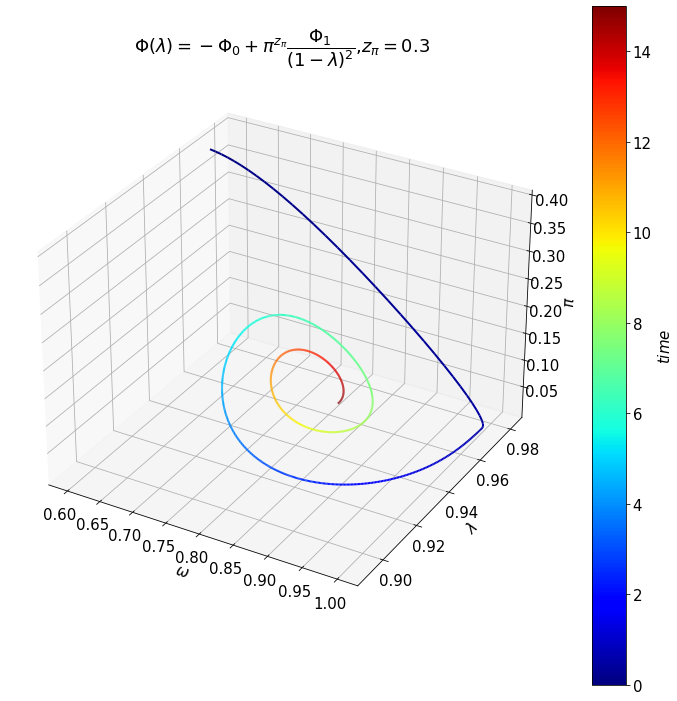

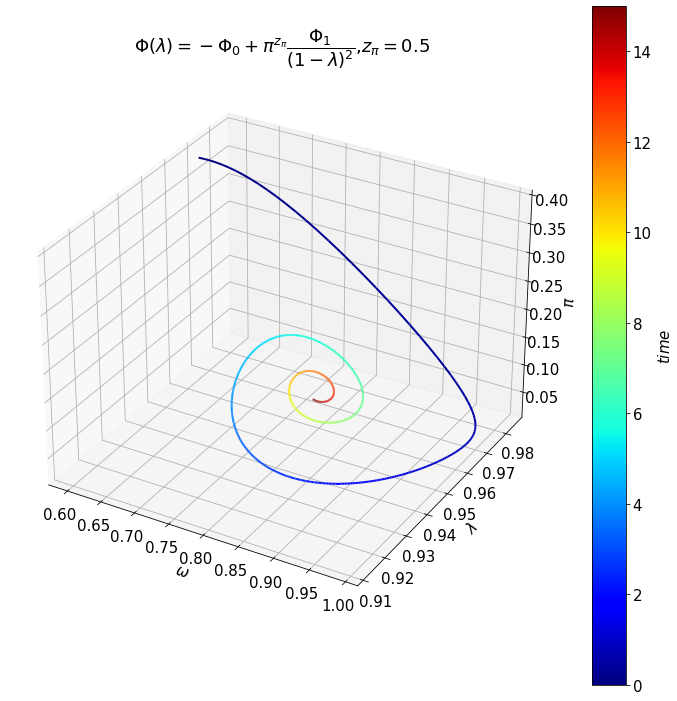

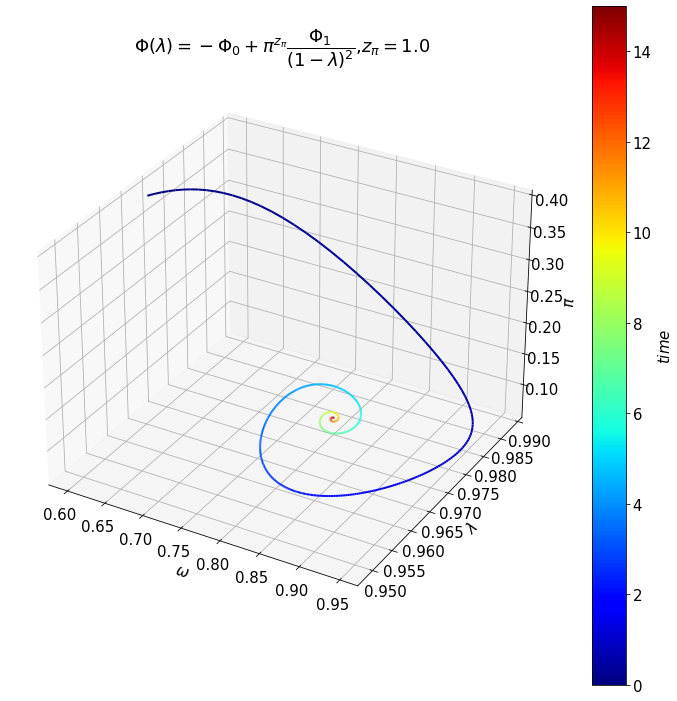

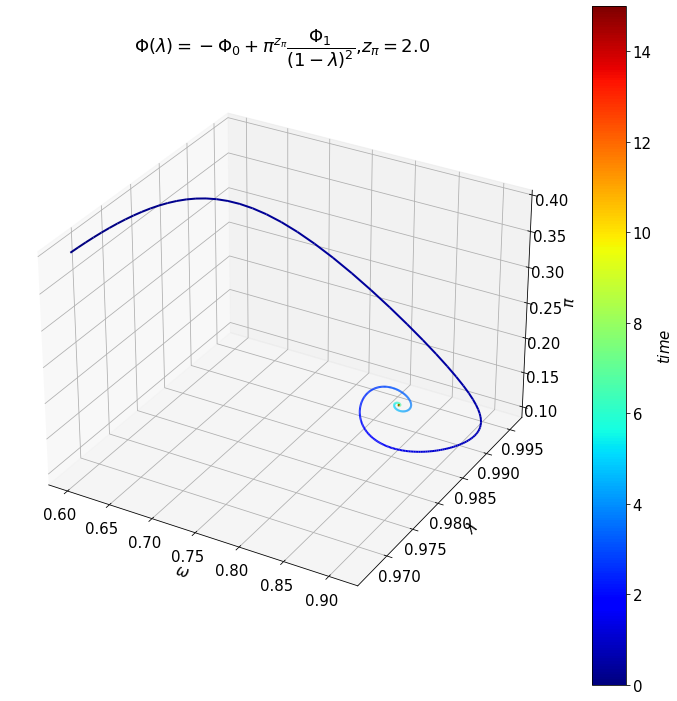

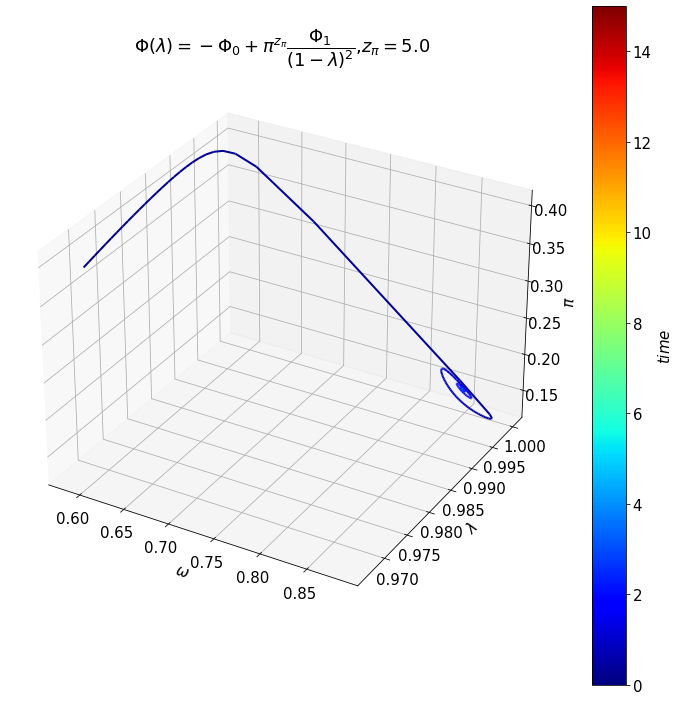

In [32]:
hub=pgm.Hub('Goodwin-PiInPhi',preset='zpi',verb=False)
hub.set_dparam(**{'nx':5,'zpi':[0.3,0.5,1,2,5],'dt':0.001,'Tmax':15})
hub.run(N=1000)
R = hub.get_dparam()
phicurv=r'$\Phi(\lambda)=-\Phi_0+\pi^{z_{\pi}}\dfrac{ \Phi_1}{(1-\lambda)^2}$'
for i in range(5):
    pgm.plots.plot3D(hub, 'omega', 'employment', 'pi', color='time', index=i,
                     title=phicurv+r',$z_{\pi}='+f"{R['zpi']['value'][i, 0, 0, 0]}$")
    

## Cost-driven inflation 

The cost to create a good : 
* labor
* intermediary consumption
* capital renewal

$$c = p (\omega + \gamma + \xi) = p (1-\pi+rd)$$

The effective markup is thus $$\mu=p/c=(\pi-rd)^{-1}$$

Usually, cost-driven inflation is done with : 
$$\dfrac{\dot{p}}{p}= \eta (\dfrac{\mu^0}{\mu} -1 )$$

An extension that should be looked would be : 
$$\dfrac{\dot{p}}{p}= \eta \ln(\dfrac{\mu^0}{\mu}) $$

At first order, it works the same way, at second order it seems more logical (very high profit has slow deflation, if c>p inflation is much faster) :
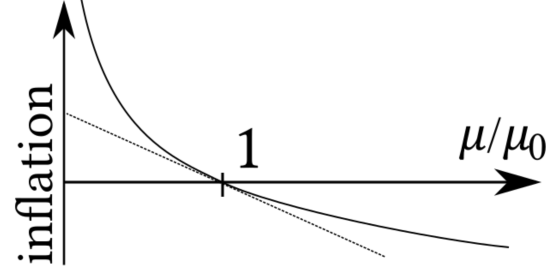

If the debt burden goes in the cost, there is no more Keen crisis

## Goodwin-Keen with new profit

1. Goodwin-Keen has hidden hypotheses : 
    * $pC:=p(Y-I)=pY(1-\kappa(\pi))$ the consumption adjust its value
    * $\dot{D_h}=-\dot{D}=rD$
    * Purchasing power of household $Y(\omega+rd)$
    
When there is a debt crisis $d \to \infty$, household are "infinitely" rich
    
2. The investment is slightly shifted $\pi=1-\omega-rd-\nu\delta$, $I=Y(\kappa(1-\omega-rd-\xi)+\xi)$      
    * In the case of a linear $\kappa(\pi)=k\pi$ $\to$ $I=Y[k(1-\omega-rd)+(1-k)\xi]$

## What you should try :
* intermediary consumption
* capex in profit, "automatic replacement"
* CES extension
* log-investment
* Philips differently ($\pi$ in $\Phi()$ ?)
* Labor relaxation 
* Endogenous productivity, non-neutral productivity

Small-talk : relax of $\lambda$ in $\Phi()$, CES endogenisation of $\nu$

# Points seen

* **stock-flows in Goodwin** that exist but remain constant and auxilliary
* **DO NOT MIX ACCOUNTABILITY DEFINITION AND STOCK-FLOW DEFINITIONS**
* **One-equation statevar feedback** : Shareholding can be non-debt generating
* **production** : we discussed about CES 
* **technological progress** We need to explore endogenisation of $\nu$, and use function of type $Y=\min (K\nu^{-1},L \mathcal{A}\nu^{-1})$ 
* **Labor level** we can decompose $L$ and $L_0$, and have a more "natural" mechanism to avoid $\lambda \geq 1$
* **price** cost-push inflation better with log in term of logics
* **Instantaneous effects** there is no relaxation in the system 
* **wage** Philips curve shape can take multiple effects
* **Exogenous population growth** Not seen
* **Investment** Decomposition with capex

To be seen later :
* **Inventory variation reaction**
* **logistic crisis, accessibility** 
* **Use of productive capital** 
* **Consumption** 

